In [ ]:
import os
import mat73
import numpy as np
import pandas as pd
from scipy.signal import welch

def get_avg_psds(freqs, psds):
    FREQ_BANDS = {"delta": [1, 5.0],
                  "theta": [5.0, 8.0],
                  "alpha": [8.0, 13.0],
                  "beta": [13.0, 30.0],
                  "gamma": [30.0, 40.0]}

    psds_bands = []
    for fmin, fmax in FREQ_BANDS.values():
        psds_slice = psds[(freqs >= fmin) & (freqs < fmax)]
        if len(psds_slice) > 0:
            psds_band = psds_slice.mean()
        else:
            psds_band = 1  # or any other value you prefer for empty slices
        psds_bands.append(psds_band)

    abs_psds = np.array(psds_bands)  # Absolute band values
    return abs_psds

def save_to_csv(subject_dir, filename, df=None):
    data_dict = mat73.loadmat(os.path.join(subject_dir, 'erp_v1.mat'))
    log_data = data_dict["log"]
    channels_of_interest = [37, 30, 47, 12, 49, 14, 51]
    channel_names = {'37': 'Fz', '30': 'Pz', '47': 'Cz', '12': 'C3', '49': 'C4', '14': 'T7', '51': 'T8'}
    column_names = ['Subject', 'Channel', 'Trial', 'Smell_ID', 'Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']
    df_list = []
    subject_id = os.path.basename(subject_dir)
    for channel_num in channels_of_interest:
        channel_name = channel_names[str(channel_num)]
        for trial in range(data_dict["erp"].shape[2]):
            # Adjust the data range to extract samples from 1100 to 1600
            erp_data = data_dict["erp"][channel_num, 1100:1600, trial]
            freqs, psds = welch(erp_data, fs=500)
            abs_psds = get_avg_psds(freqs, psds)
            smell_id = log_data[trial, 1]  # Get the smell ID for the current trial
            df_list.append(pd.DataFrame([[subject_id, channel_name, trial + 1, smell_id] + list(abs_psds)],
                                         columns=column_names))
    if df is None:
        df = pd.concat(df_list, ignore_index=True)
    else:
        df = pd.concat([df] + df_list, ignore_index=True)
    df.to_csv(filename, index=False)


# Path to the directory containing subject data
root_directory = r"C:\Users\Aryan\Documents\MATLAB\Kato_et_al - Copy\Kato_et_al\ProcData\EEG"

# Initialize an empty DataFrame to hold all data
all_data_df = None

# Iterate over subject directories
for subject_dir in os.listdir(root_directory):
    if not subject_dir.startswith('.'):  # Skip directories starting with '.'
        subject_dir_path = os.path.join(root_directory, subject_dir)
        if os.path.isdir(subject_dir_path):
            save_to_csv(subject_dir_path, "psd_results_all_subjects_1_sec.csv", all_data_df)

print("Data saved to psd_results_all_subj")

In [3]:
import os
import mat73
import numpy as np
import pandas as pd
from scipy.signal import welch

def get_avg_psds(freqs, psds):
    FREQ_BANDS = {"delta": [1, 5.0],
                  "theta": [5.0, 8.0],
                  "alpha": [8.0, 13.0],
                  "beta": [13.0, 30.0],
                  "gamma": [30.0, 40.0]}

    psds_bands = []
    for fmin, fmax in FREQ_BANDS.values():
        psds_slice = psds[(freqs >= fmin) & (freqs < fmax)]
        if len(psds_slice) > 0:
            psds_band = psds_slice.mean()
        else:
            psds_band = 1  # or any other value you prefer for empty slices
        psds_bands.append(psds_band)

    abs_psds = np.array(psds_bands)  # Absolute band values
    return abs_psds

def save_to_csv(subject_dir, filename, df=None):
    data_dict = mat73.loadmat(os.path.join(subject_dir, 'erp_v1.mat'))
    log_data = data_dict["log"]
    # Modify channel names
    channel_names = ['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2']
    column_names = ['Subject', 'Channel', 'Trial', 'Smell_ID', 'Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']
    df_list = []
    subject_id = os.path.basename(subject_dir)
    for channel_num in range(len(channel_names)):
        channel_name = channel_names[channel_num]
        for trial in range(data_dict["erp"].shape[2]):
            # Adjust the data range to extract samples from 1100 to 1600
            erp_data = data_dict["erp"][channel_num, 1100:1600, trial]
            freqs, psds = welch(erp_data, fs=500)
            abs_psds = get_avg_psds(freqs, psds)
            smell_id = log_data[trial, 1]  # Get the smell ID for the current trial
            df_list.append(pd.DataFrame([[subject_id, channel_name, trial + 1, smell_id] + list(abs_psds)],
                                         columns=column_names))
    if df is None:
        df = pd.concat(df_list, ignore_index=True)
    else:
        df = pd.concat([df] + df_list, ignore_index=True)
    df.to_csv(filename, index=False)


# Path to the directory containing subject data
root_directory = r"C:\Users\Aryan\Documents\MATLAB\Kato_et_al - Copy\Kato_et_al\ProcData\EEG\KM26_s01"
output_filename = "psd_results_onesubj_1sec.csv"

save_to_csv(root_directory, output_filename)

print("Data saved to psd_results_onesubj_1sec.csv")


Data saved to psd_results_onesubj_1sec.csv


In [4]:
import os
import mat73
import numpy as np
import pandas as pd
from scipy.signal import welch

def get_avg_psds(freqs, psds):
    FREQ_BANDS = {"delta": [1, 5.0],
                  "theta": [5.0, 8.0],
                  "alpha": [8.0, 13.0],
                  "beta": [13.0, 30.0],
                  "gamma": [30.0, 40.0]}

    psds_bands = []
    for fmin, fmax in FREQ_BANDS.values():
        psds_slice = psds[(freqs >= fmin) & (freqs < fmax)]
        if len(psds_slice) > 0:
            psds_band = psds_slice.mean()
        else:
            psds_band = 1  # or any other value you prefer for empty slices
        psds_bands.append(psds_band)

    abs_psds = np.array(psds_bands)  # Absolute band values
    return abs_psds
    
def save_to_csv(subject_dir, filename, df=None):
    data_dict = mat73.loadmat(os.path.join(subject_dir, 'erp_v1.mat'))
    log_data = data_dict["log"]
    # Modify channel names
    channel_names = ['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2']
    column_names = ['Subject', 'Channel', 'Trial', 'Smell_ID', 'Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']
    df_list = []
    subject_id = os.path.basename(subject_dir)
    for channel_num in range(len(channel_names)):
        channel_name = channel_names[channel_num]
        avg_values = {'Delta': [], 'Theta': [], 'Alpha': [], 'Beta': [], 'Gamma': []}
        for trial in range(data_dict["erp"].shape[2]):
            # Adjust the data range to extract samples from 1100 to 1600
            erp_data = data_dict["erp"][channel_num, 1100:1600, trial]
            freqs, psds = welch(erp_data, fs=500)
            abs_psds = get_avg_psds(freqs, psds)
            # Append PSD values to the respective lists
            for band, value in zip(column_names[4:], abs_psds):
                avg_values[band].append(value)
        
        # Calculate average PSD values for each band
        avg_psds = {band: np.mean(values) for band, values in avg_values.items()}
        
        # Append data to the DataFrame list
        df_list.append(pd.DataFrame([[subject_id, channel_name, 1, '', avg_psds['Delta'], avg_psds['Theta'], avg_psds['Alpha'], avg_psds['Beta'], avg_psds['Gamma']]], columns=column_names))
    
    # Concatenate DataFrames
    if df is None:
        df = pd.concat(df_list, ignore_index=True)
    else:
        df = pd.concat([df] + df_list, ignore_index=True)
    
    # Save DataFrame to CSV
    df.to_csv(filename, index=False)

# Path to the directory containing subject data
root_directory = r"C:\Users\Aryan\Documents\MATLAB\Kato_et_al - Copy\Kato_et_al\ProcData\EEG\KM26_s01"
output_filename = "psd_results_onesubj_1sec_avg.csv"

save_to_csv(root_directory, output_filename)

print("Data saved to psd_results_onesubj_1sec_avg.csv")

Data saved to psd_results_onesubj_1sec_avg.csv


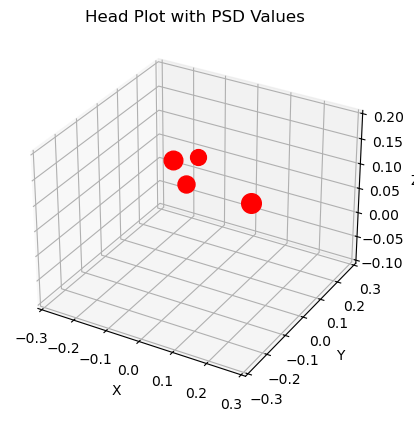

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Example PSD values for each channel
psd_values = {
    'Fp1': 1.5,
    'Fp2': 2.0,
    'F7': 1.8,
    'F3': 1.3,
    # Add more channels and their PSD values here
}

# Coordinates of each electrode/channel on the scalp
electrode_coordinates = {
    'Fp1': (-0.1, 0.1, 0.05),
    'Fp2': (0.1, 0.1, 0.05),
    'F7': (-0.2, 0.2, 0.05),
    'F3': (-0.15, 0.25, 0.05),
    # Add more channels and their coordinates here
}

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each electrode as a scatter point
for channel, coord in electrode_coordinates.items():
    x, y, z = coord
    psd = psd_values.get(channel, 0.0)  # Get PSD value for the channel
    ax.scatter(x, y, z, color='r', s=psd*100)  # Adjust size based on PSD value

# Set plot labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Head Plot with PSD Values')

# Set plot limits
ax.set_xlim([-0.3, 0.3])
ax.set_ylim([-0.3, 0.3])
ax.set_zlim([-0.1, 0.2])

# Show plot
plt.show()


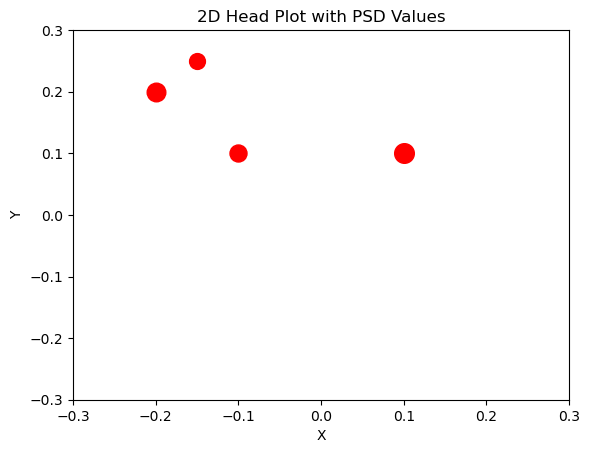

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Example PSD values for each channel
psd_values = {
    'Fp1': 1.5,
    'Fp2': 2.0,
    'F7': 1.8,
    'F3': 1.3,
    # Add more channels and their PSD values here
}

# Coordinates of each electrode/channel on the scalp
electrode_coordinates = {
    'Fp1': (-0.1, 0.1),
    'Fp2': (0.1, 0.1),
    'F7': (-0.2, 0.2),
    'F3': (-0.15, 0.25),
    # Add more channels and their coordinates here
}

# Create a 2D plot
plt.figure()

# Plot each electrode as a scatter point
for channel, coord in electrode_coordinates.items():
    x, y = coord
    psd = psd_values.get(channel, 0.0)  # Get PSD value for the channel
    plt.scatter(x, y, color='r', s=psd*100)  # Adjust size based on PSD value

# Set plot labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Head Plot with PSD Values')

# Set plot limits
plt.xlim([-0.3, 0.3])
plt.ylim([-0.3, 0.3])

# Show plot
plt.show()


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import mne

# Example PSD values for each channel
psd_values = {
    'Fp1': 1.5,
    'Fp2': 2.0,
    'F7': 1.8,
    'F3': 1.3,
    # Add more channels and their PSD values here
}

# Create an info structure for MNE
info = mne.create_info(ch_names=list(psd_values.keys()), sfreq=1, ch_types='eeg')

# Create an Evoked object with the PSD values
evoked = mne.EvokedArray(np.array(list(psd_values.values()))[:, np.newaxis], info)

# Plot the topomap
evoked.plot_topomap(times=0, scalings=dict(eeg=1), cmap='viridis', show=True)


RuntimeError: No digitization points found.

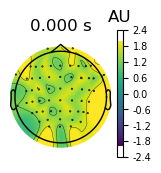

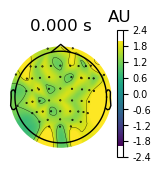

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import mne

# Example PSD values for each channel
psd_values = {
    'Fp1': 1.5, 'Fp2': 2.0, 'F7': 1.8, 'F3': 1.3, 'Fz': 1.2, 'F4': 1.1, 'F8': 1.4,
    'FT9': 1.6, 'FT7': 1.9, 'FC5': 1.7, 'FC3': 1.2, 'FC1': 1.5, 'FCz': 1.8, 'FC2': 1.3, 'FC4': 1.6, 'FC6': 1.9,
    'T7': 1.2, 'C5': 1.5, 'C3': 1.8, 'C1': 1.1, 'Cz': 1.4, 'C2': 1.7, 'C4': 1.3, 'C6': 1.6, 'T8': 1.9,
    'TP9': 1.2, 'TP7': 1.5, 'CP5': 1.8, 'CP3': 1.1, 'CP1': 1.4, 'CPz': 1.7, 'CP2': 1.3, 'CP4': 1.6, 'CP6': 1.9,
    'P7': 1.2, 'P5': 1.5, 'P3': 1.8, 'P1': 1.1, 'Pz': 1.4, 'P2': 1.7, 'P4': 1.3, 'P6': 1.6, 'P8': 1.9,
    'PO7': 1.2, 'PO3': 1.5, 'O1': 1.8, 'Oz': 1.1, 'POz': 1.4, 'O2': 1.7, 'PO4': 1.3, 'PO8': 1.6,
    'FT10': 1.9, 'FT8': 1.2, 'FC6': 1.5, 'FC4': 1.8, 'FC2': 1.1, 'FCz': 1.4, 'FC1': 1.7, 'FC3': 1.3, 'FC5': 1.6,
    'F8': 1.9, 'F6': 1.2, 'F4': 1.5, 'F2': 1.8, 'Fz': 1.1, 'F1': 1.4, 'F3': 1.7, 'F5': 1.3,
}

# Load a sample montage with electrode coordinates
montage = mne.channels.make_standard_montage('standard_1005')

# Create an info structure for MNE
info = mne.create_info(ch_names=list(psd_values.keys()), sfreq=1, ch_types='eeg')

# Set electrode positions
info.set_montage(montage)

# Create an Evoked object with the PSD values
evoked = mne.EvokedArray(np.array(list(psd_values.values()))[:, np.newaxis], info)

# Plot the topomap
evoked.plot_topomap(times=0, scalings=dict(eeg=1), cmap='viridis', show=True)


In [9]:
import pandas as pd

# Load the data from the CSV file
df = pd.read_csv("psd_results_onesubj_1sec_avg.csv")

# Print the head of the DataFrame
print(df.head())


    Subject Channel  Trial  Smell_ID     Delta     Theta     Alpha      Beta  \
0  KM26_s01     Fp1      1       NaN  3.197993  1.637065  2.057262  0.360223   
1  KM26_s01     AF7      1       NaN  2.182931  0.992242  1.684025  0.261819   
2  KM26_s01     AF3      1       NaN  2.251975  1.548423  2.086580  0.321556   
3  KM26_s01      F1      1       NaN  1.618162  1.350562  1.959005  0.288775   
4  KM26_s01      F3      1       NaN  1.290211  1.038318  1.615474  0.238471   

      Gamma  
0  0.028415  
1  0.021783  
2  0.021857  
3  0.019752  
4  0.017027  


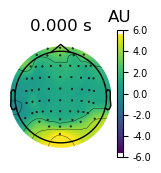

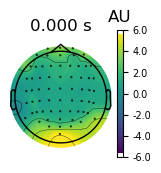

In [13]:
import pandas as pd
import numpy as np
import mne
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv("psd_results_onesubj_1sec_avg.csv")

# Extract relevant columns for plotting
channels = df['Channel']
bands = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']
psd_data = np.array([df[band].values for band in bands])

# Transpose the PSD data to have channels as rows and frequency bands as columns
psd_data = psd_data.T

# Create info structure for MNE
# Assuming a standard 10-20 electrode layout
montage = mne.channels.make_standard_montage('standard_1005')
info = mne.create_info(ch_names=channels.tolist(), sfreq=1, ch_types='eeg')
info.set_montage(montage)

# Create an Evoked object with the PSD values
evoked = mne.EvokedArray(psd_data, info)

# Plot the topomap for each frequency band
evoked.plot_topomap(times=0, ch_type='eeg', scalings=dict(eeg=1), cmap='viridis', show=True, colorbar=True)


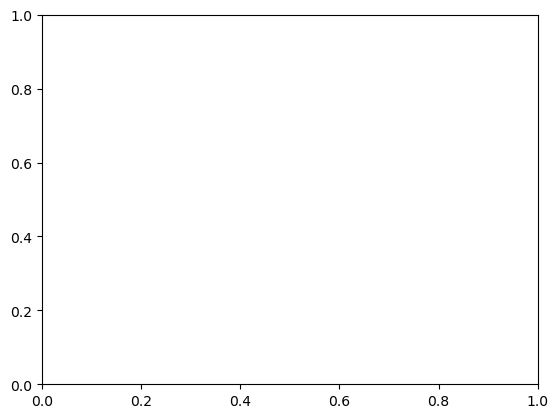

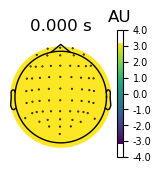

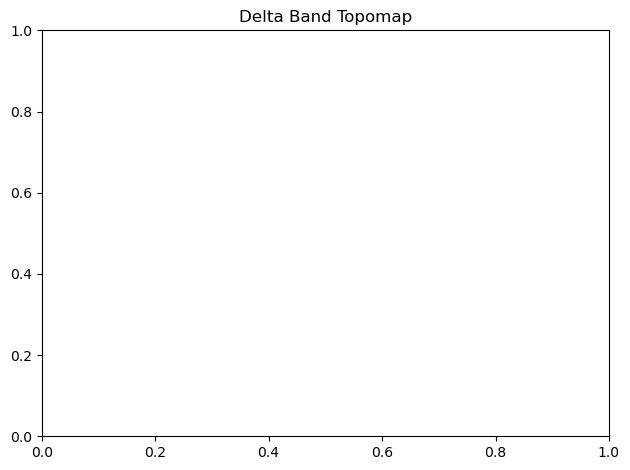

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mne

# Load the data from the CSV file
df = pd.read_csv("psd_results_onesubj_1sec_avg.csv")

# Extract PSD values for the Delta band
delta_band = df['Delta'].values

# Create info structure for MNE
# Assuming a standard 10-20 electrode layout
montage = mne.channels.make_standard_montage('standard_1005')
info = mne.create_info(ch_names=df['Channel'].tolist(), sfreq=1, ch_types='eeg')
info.set_montage(montage)

# Create dummy PSD data for the Delta band across all channels
psd_data_delta = np.tile(delta_band, (len(df), 1))

# Create an Evoked object for the Delta band
evoked_delta = mne.EvokedArray(psd_data_delta, info)

# Plot the topomap for the Delta band
fig, ax = plt.subplots()
evoked_delta.plot_topomap(times=0, ch_type='eeg', scalings=dict(eeg=1), cmap='viridis', show=True, colorbar=True)
plt.title('Delta Band Topomap')  # Set the title
plt.tight_layout()
plt.show()


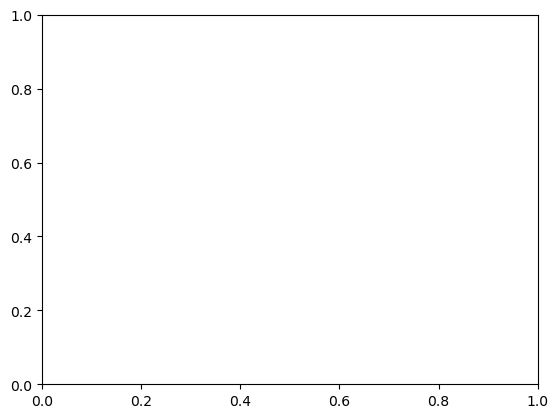

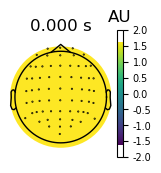

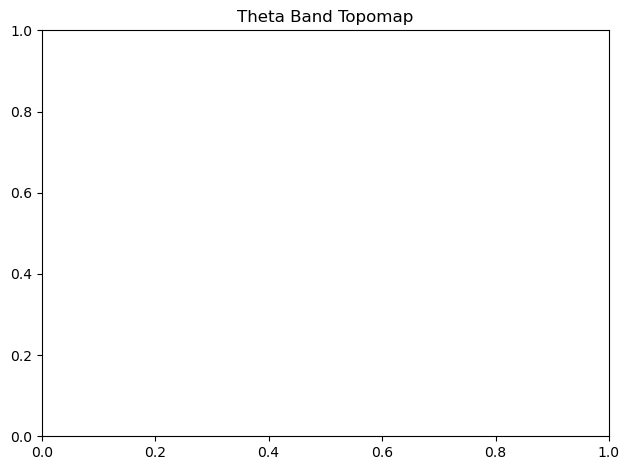

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mne

# Load the data from the CSV file
df = pd.read_csv("psd_results_onesubj_1sec_avg.csv")

# Extract PSD values for the Theta band
theta_band = df['Theta'].values

# Create info structure for MNE
# Assuming a standard 10-20 electrode layout
montage = mne.channels.make_standard_montage('standard_1005')
info = mne.create_info(ch_names=df['Channel'].tolist(), sfreq=1, ch_types='eeg')
info.set_montage(montage)

# Create dummy PSD data for the Theta band across all channels
psd_data_theta = np.tile(theta_band, (len(df), 1))

# Create an Evoked object for the Theta band
evoked_theta = mne.EvokedArray(psd_data_theta, info)

# Plot the topomap for the Theta band
fig, ax = plt.subplots()
evoked_theta.plot_topomap(times=0, ch_type='eeg', scalings=dict(eeg=1), cmap='viridis', show=True, colorbar=True)
plt.title('Theta Band Topomap')  # Set the title
plt.tight_layout()
plt.show()


In [18]:
import pandas as pd

# Load the data from the CSV file
df = pd.read_csv("psd_results_onesubj_1sec_avg.csv")

# Drop the 'Trial' and 'Smell_ID' columns
df.drop(['Trial', 'Smell_ID'], axis=1, inplace=True)

# Save the modified DataFrame back to a CSV file
df.to_csv("psd_results_onesubj_1sec_avg_modified.csv", index=False)


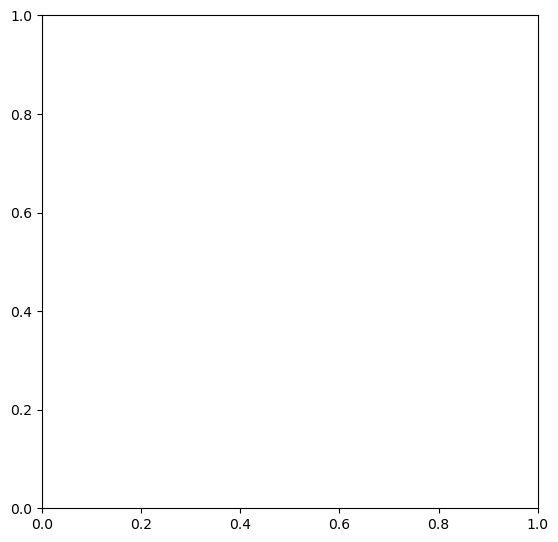

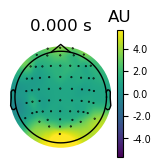

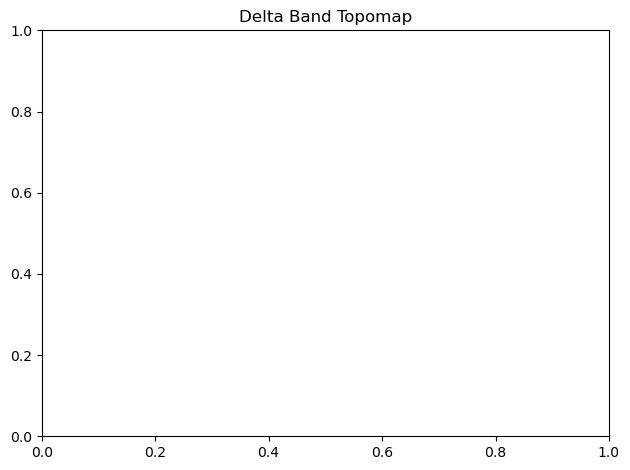

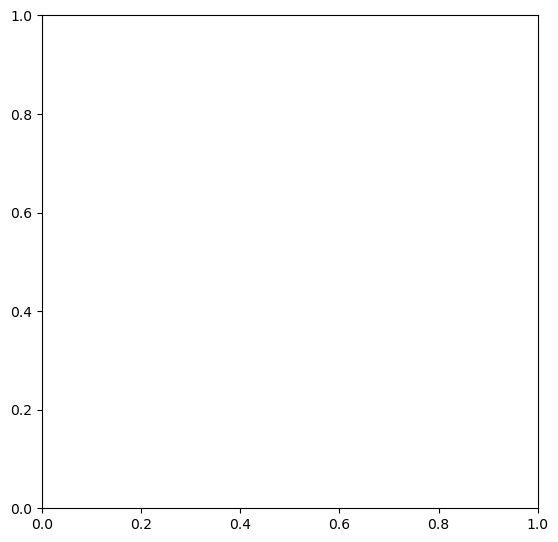

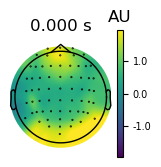

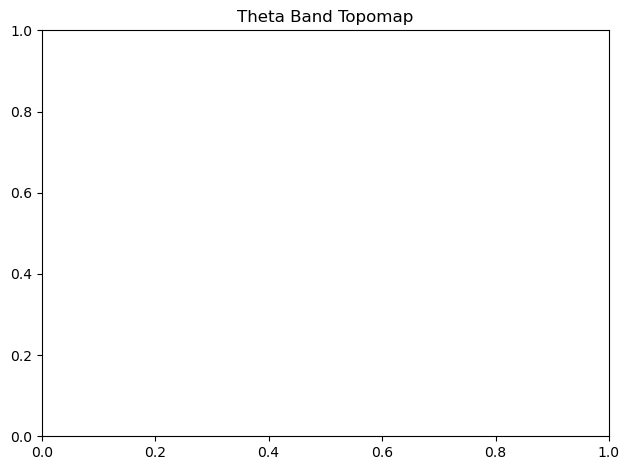

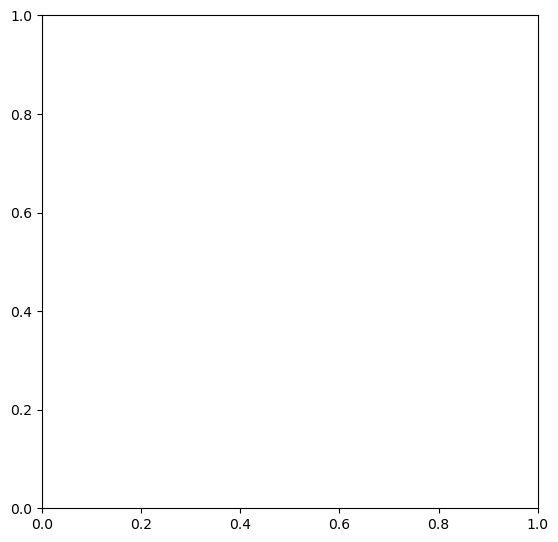

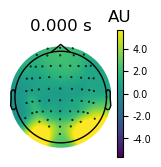

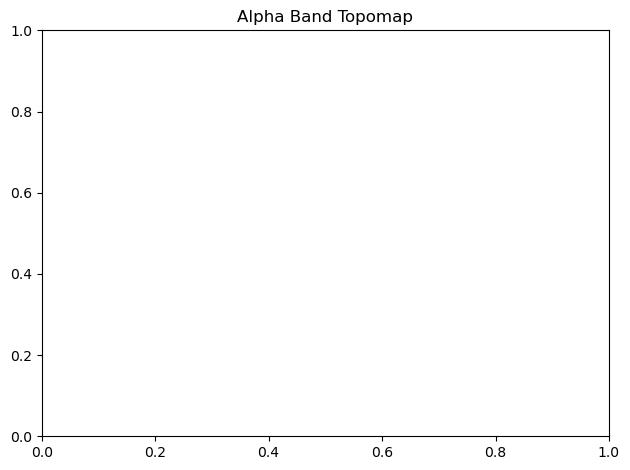

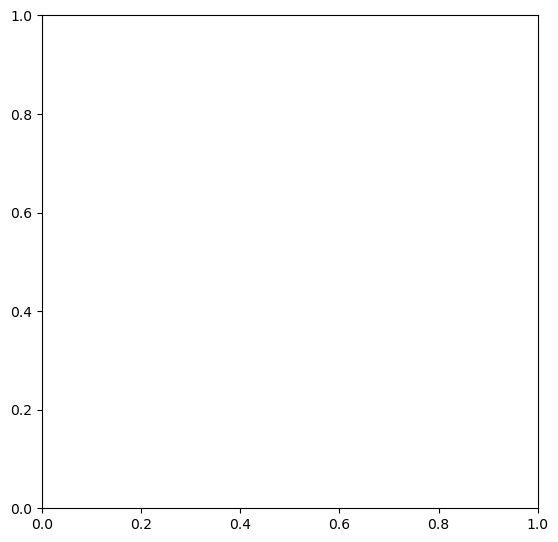

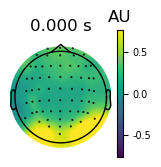

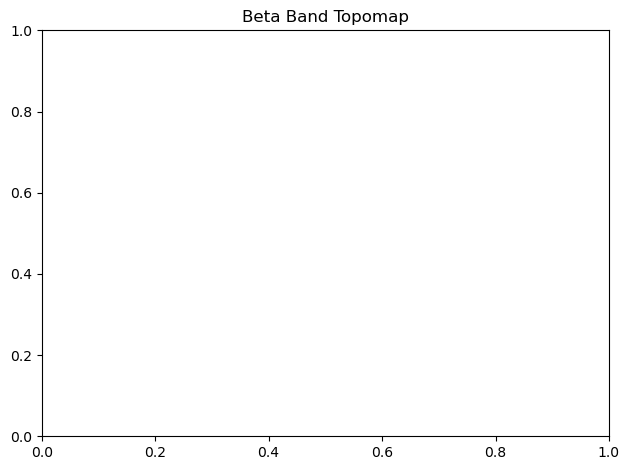

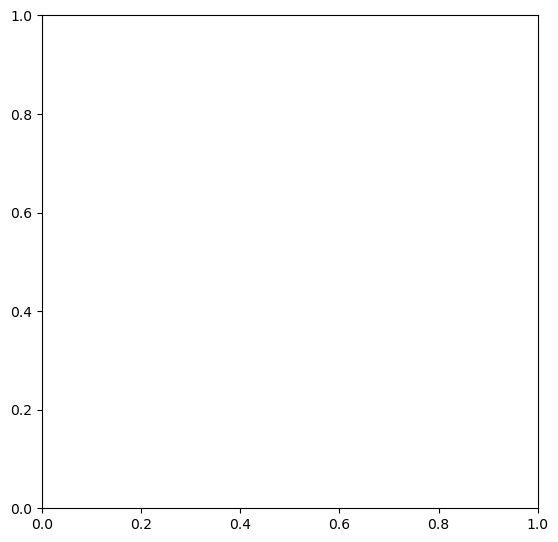

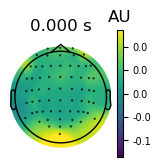

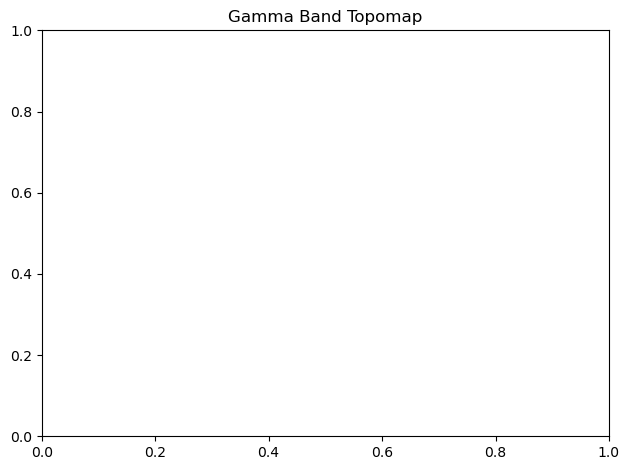

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mne

# Load the data from the modified CSV file
df = pd.read_csv("psd_results_onesubj_1sec_avg_modified.csv")

# Extract channel names and PSD values for each frequency band
channels = df['Channel'].tolist()
psd_data = df[['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']].values

# Create info structure for MNE
# Assuming a standard 10-20 electrode layout
montage = mne.channels.make_standard_montage('standard_1005')
info = mne.create_info(ch_names=channels, sfreq=1, ch_types='eeg')
info.set_montage(montage)

# Create Evoked objects for each frequency band
evokeds = [mne.EvokedArray(psd_data[:, [i]], info) for i in range(psd_data.shape[1])]

# Plot the topomap for each frequency band with a size of 512x512 pixels
bands = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']
for band, evoked in zip(bands, evokeds):
    fig, ax = plt.subplots(figsize=(6.4, 6.4))  # 512x512 pixels at 100 DPI
    evoked.plot_topomap(times=0, ch_type='eeg', scalings=dict(eeg=1), cmap='viridis', show=True, colorbar=True,
                         contours=False, res=512, outlines='head')
    plt.title(f'{band} Band Topomap')  # Set the title
    plt.tight_layout()

plt.show()


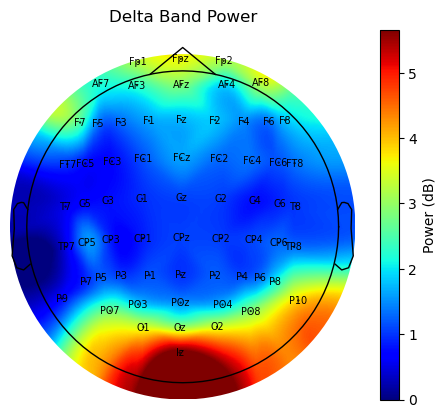

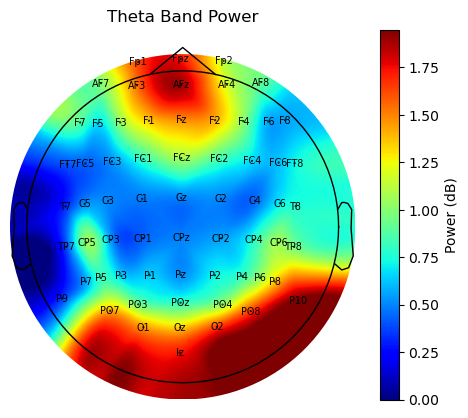

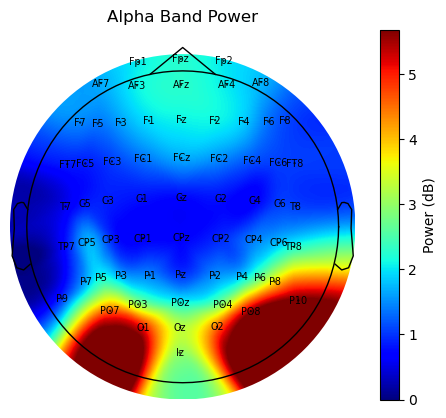

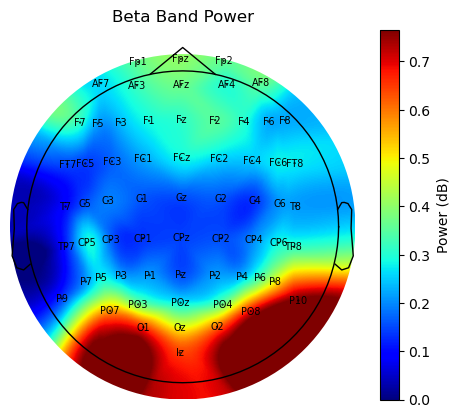

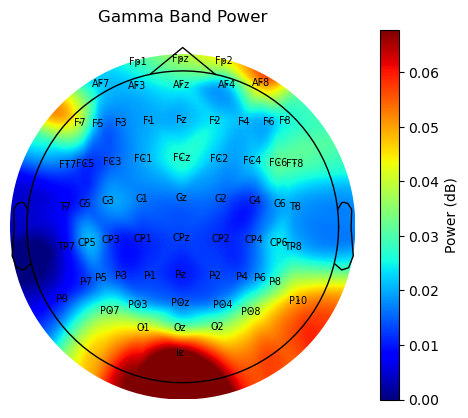

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mne

# Load the PSD data
psd_data =  pd.read_csv("psd_results_onesubj_1sec_avg_modified.csv")

# Define the channel names
ch_names = psd_data['Channel'].tolist()

# Define the coordinates for the 64 channels based on the 10-20 system
layout = {
    'Fp1': (-0.35, 0.08), 'Fpz': (0, 0.09), 'Fp2': (0.35, 0.08),
    'F7': (-0.6, 0.25), 'F3': (-0.25, 0.4), 'Fz': (0, 0.5), 'F4': (0.25, 0.4), 'F8': (0.6, 0.25),
    'FC5': (-0.45, 0.55), 'FC1': (-0.2, 0.65), 'FC2': (0.2, 0.65), 'FC6': (0.45, 0.55),
    'M1': (-0.85, 0.6), 'T7': (-0.6, 0.8), 'C3': (-0.35, 0.9), 'Cz': (0, 1), 'C4': (0.35, 0.9), 'T8': (0.6, 0.8), 'M2': (0.85, 0.6),
    'CP5': (-0.45, 1.25), 'CP1': (-0.2, 1.35), 'CP2': (0.2, 1.35), 'CP6': (0.45, 1.25),
    'P7': (-0.6, 1.4), 'P3': (-0.25, 1.6), 'Pz': (0, 1.7), 'P4': (0.25, 1.6), 'P8': (0.6, 1.4),
    'POz': (0, 2), 'O1': (-0.35, 2.1), 'Oz': (0, 2.2), 'O2': (0.35, 2.1),
    'AF7': (-0.5, 0.2), 'AF3': (-0.3, 0.3), 'AF4': (0.3, 0.3), 'AF8': (0.5, 0.2),
    'F5': (-0.5, 0.45), 'F1': (-0.3, 0.55), 'F2': (0.3, 0.55), 'F6': (0.5, 0.45),
    'FC3': (-0.35, 0.7), 'FCz': (0, 0.8), 'FC4': (0.35, 0.7),
    'C5': (-0.45, 1), 'C1': (-0.25, 1.1), 'C2': (0.25, 1.1), 'C6': (0.45, 1),
    'CP3': (-0.35, 1.3), 'CPz': (0, 1.4), 'CP4': (0.35, 1.3),
    'P5': (-0.5, 1.55), 'P1': (-0.3, 1.65), 'P2': (0.3, 1.65), 'P6': (0.5, 1.55),
    'PO3': (-0.35, 1.8), 'PO4': (0.35, 1.8),
    'FT7': (-0.65, 0.65), 'FT8': (0.65, 0.65),
    'TP7': (-0.65, 1.1), 'TP8': (0.65, 1.1),
    'PO7': (-0.65, 1.75), 'PO8': (0.65, 1.75)
}

# Create a standard 10-20 montage
montage = mne.channels.make_standard_montage('standard_1020')

# Iterate over bands and plot topoplots
bands = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']
for band in bands:
    # Extract PSD values for the current band
    band_values = psd_data[band].values
    
    # Create an info structure
    info = mne.create_info(ch_names=ch_names, sfreq=500, ch_types='eeg')
    info.set_montage(montage)

    # Plot the topomap
    fig, ax = plt.subplots()
    mne.viz.plot_topomap(band_values, info, show=False, axes=ax, names=ch_names, cmap='jet', contours=False)
    ax.set_title(f'{band} Band Power')
    plt.colorbar(ax.get_images()[0], ax=ax, orientation='vertical', label='Power (dB)')
    plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mne

# Load the PSD data
psd_data = pd.read_csv(r"F:\IIT_MANDI\SMELL\OUTPUT_CSV\psd_results_onesubj_1sec._1trail.csv")

# Define the channel names
ch_names = psd_data['Channel'].tolist()

# Define the coordinates for the 64 channels based on the 10-20 system
layout = {
    'Fp1': (-0.35, 0.08), 'Fpz': (0, 0.09), 'Fp2': (0.35, 0.08),
    'F7': (-0.6, 0.25), 'F3': (-0.25, 0.4), 'Fz': (0, 0.5), 'F4': (0.25, 0.4), 'F8': (0.6, 0.25),
    'FC5': (-0.45, 0.55), 'FC1': (-0.2, 0.65), 'FC2': (0.2, 0.65), 'FC6': (0.45, 0.55),
    'M1': (-0.85, 0.6), 'T7': (-0.6, 0.8), 'C3': (-0.35, 0.9), 'Cz': (0, 1), 'C4': (0.35, 0.9), 'T8': (0.6, 0.8), 'M2': (0.85, 0.6),
    'CP5': (-0.45, 1.25), 'CP1': (-0.2, 1.35), 'CP2': (0.2, 1.35), 'CP6': (0.45, 1.25),
    'P7': (-0.6, 1.4), 'P3': (-0.25, 1.6), 'Pz': (0, 1.7), 'P4': (0.25, 1.6), 'P8': (0.6, 1.4),
    'POz': (0, 2), 'O1': (-0.35, 2.1), 'Oz': (0, 2.2), 'O2': (0.35, 2.1),
    'AF7': (-0.5, 0.2), 'AF3': (-0.3, 0.3), 'AF4': (0.3, 0.3), 'AF8': (0.5, 0.2),
    'F5': (-0.5, 0.45), 'F1': (-0.3, 0.55), 'F2': (0.3, 0.55), 'F6': (0.5, 0.45),
    'FC3': (-0.35, 0.7), 'FCz': (0, 0.8), 'FC4': (0.35, 0.7),
    'C5': (-0.45, 1), 'C1': (-0.25, 1.1), 'C2': (0.25, 1.1), 'C6': (0.45, 1),
    'CP3': (-0.35, 1.3), 'CPz': (0, 1.4), 'CP4': (0.35, 1.3),
    'P5': (-0.5, 1.55), 'P1': (-0.3, 1.65), 'P2': (0.3, 1.65), 'P6': (0.5, 1.55),
    'PO3': (-0.35, 1.8), 'PO4': (0.35, 1.8),
    'FT7': (-0.65, 0.65), 'FT8': (0.65, 0.65),
    'TP7': (-0.65, 1.1), 'TP8': (0.65, 1.1),
    'PO7': (-0.65, 1.75), 'PO8': (0.65, 1.75)
}

# Create a standard 10-20 montage
montage = mne.channels.make_standard_montage('standard_1020')

# Iterate over bands and plot topoplots
bands = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']
for band in bands:
    # Extract PSD values for the current band
    band_values = psd_data[band].values
    
    # Create an info structure
    info = mne.create_info(ch_names=ch_names, sfreq=500, ch_types='eeg')
    info.set_montage(montage)

    # Set the figure size explicitly
    fig, ax = plt.subplots(figsize=(8, 8))  # 8x8 inches = 512x512 pixels at 64 pixels per inch (ppi)

    # Plot the topomap
    mne.viz.plot_topomap(band_values, info, show=False, axes=ax, names=ch_names, cmap='jet', contours=False)

    # Set title and colorbar
    ax.set_title(f'{band} Band Power')
    plt.colorbar(ax.get_images()[0], ax=ax, orientation='vertical', label='Power (dB)')

    # Show the plot
    plt.show()

In [25]:
import pandas as pd

# Load the data from the CSV file
df = pd.read_csv("psd_results_onesubj_1sec.csv")

# Print the head of the DataFrame
print(df.head())


    Subject Channel  Trial  Smell_ID     Delta     Theta     Alpha      Beta  \
0  KM26_s01     Fp1      1       6.0  6.536162  2.845402  3.086877  0.292184   
1  KM26_s01     Fp1      2      21.0  2.523370  1.325490  1.212233  0.786377   
2  KM26_s01     Fp1      3      22.0  1.476276  0.695876  0.867408  0.217183   
3  KM26_s01     Fp1      4      17.0  2.844562  0.288625  0.668502  0.218728   
4  KM26_s01     Fp1      5      16.0  1.328157  0.251815  0.459207  0.259622   

      Gamma  
0  0.019432  
1  0.012687  
2  0.090059  
3  0.008399  
4  0.006856  


In [26]:
# Sort the DataFrame by the "Trial" column
df_sorted = df.sort_values(by='Trial')

# Print the head of the sorted DataFrame
print(df_sorted.head())


        Subject Channel  Trial  Smell_ID     Delta     Theta     Alpha  \
0      KM26_s01     Fp1      1       6.0  6.536162  2.845402  3.086877   
7008   KM26_s01     PO7      1       6.0  2.547417  3.596194  2.054847   
6716   KM26_s01      P9      1       6.0  0.792646  0.772661  0.379879   
6424   KM26_s01      P7      1       6.0  1.248335  1.868956  0.996624   
16936  KM26_s01      P6      1       6.0  1.827463  1.235719  1.668516   

           Beta     Gamma  
0      0.292184  0.019432  
7008   0.581782  0.036579  
6716   0.152035  0.010297  
6424   0.229782  0.010604  
16936  0.308691  0.020053  


In [27]:
# Sort the DataFrame by the "Trial" column
df_sorted = df.sort_values(by='Trial')

# Print the head of the sorted DataFrame
print(df_sorted.head())

# Save the sorted DataFrame to a CSV file
df_sorted.to_csv("sorted_psd_results_onesubj_1sec.csv", index=False)


        Subject Channel  Trial  Smell_ID     Delta     Theta     Alpha  \
0      KM26_s01     Fp1      1       6.0  6.536162  2.845402  3.086877   
7008   KM26_s01     PO7      1       6.0  2.547417  3.596194  2.054847   
6716   KM26_s01      P9      1       6.0  0.792646  0.772661  0.379879   
6424   KM26_s01      P7      1       6.0  1.248335  1.868956  0.996624   
16936  KM26_s01      P6      1       6.0  1.827463  1.235719  1.668516   

           Beta     Gamma  
0      0.292184  0.019432  
7008   0.581782  0.036579  
6716   0.152035  0.010297  
6424   0.229782  0.010604  
16936  0.308691  0.020053  


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mne
import os

# Load the sorted PSD data
psd_data = pd.read_csv(r"sorted_psd_results_onesubj_1sec.csv")

# Define the output folder
output_folder = r"C:\Users\Aryan\Documents\MATLAB\smell eeg\figures"
# Define the coordinates for the 64 channels based on the 10-20 system
layout = {
    'Fp1': (-0.35, 0.08), 'Fpz': (0, 0.09), 'Fp2': (0.35, 0.08),
    'F7': (-0.6, 0.25), 'F3': (-0.25, 0.4), 'Fz': (0, 0.5), 'F4': (0.25, 0.4), 'F8': (0.6, 0.25),
    'FC5': (-0.45, 0.55), 'FC1': (-0.2, 0.65), 'FC2': (0.2, 0.65), 'FC6': (0.45, 0.55),
    'M1': (-0.85, 0.6), 'T7': (-0.6, 0.8), 'C3': (-0.35, 0.9), 'Cz': (0, 1), 'C4': (0.35, 0.9), 'T8': (0.6, 0.8), 'M2': (0.85, 0.6),
    'CP5': (-0.45, 1.25), 'CP1': (-0.2, 1.35), 'CP2': (0.2, 1.35), 'CP6': (0.45, 1.25),
    'P7': (-0.6, 1.4), 'P3': (-0.25, 1.6), 'Pz': (0, 1.7), 'P4': (0.25, 1.6), 'P8': (0.6, 1.4),
    'POz': (0, 2), 'O1': (-0.35, 2.1), 'Oz': (0, 2.2), 'O2': (0.35, 2.1),
    'AF7': (-0.5, 0.2), 'AF3': (-0.3, 0.3), 'AF4': (0.3, 0.3), 'AF8': (0.5, 0.2),
    'F5': (-0.5, 0.45), 'F1': (-0.3, 0.55), 'F2': (0.3, 0.55), 'F6': (0.5, 0.45),
    'FC3': (-0.35, 0.7), 'FCz': (0, 0.8), 'FC4': (0.35, 0.7),
    'C5': (-0.45, 1), 'C1': (-0.25, 1.1), 'C2': (0.25, 1.1), 'C6': (0.45, 1),
    'CP3': (-0.35, 1.3), 'CPz': (0, 1.4), 'CP4': (0.35, 1.3),
    'P5': (-0.5, 1.55), 'P1': (-0.3, 1.65), 'P2': (0.3, 1.65), 'P6': (0.5, 1.55),
    'PO3': (-0.35, 1.8), 'PO4': (0.35, 1.8),
    'FT7': (-0.65, 0.65), 'FT8': (0.65, 0.65),
    'TP7': (-0.65, 1.1), 'TP8': (0.65, 1.1),
    'PO7': (-0.65, 1.75), 'PO8': (0.65, 1.75)
}
# Iterate over unique trials
unique_trials = psd_data['Trial'].unique()
for trial in unique_trials:
    # Filter data for the current trial
    trial_data = psd_data[psd_data['Trial'] == trial]

    # Iterate over bands
    bands = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']
    for band in bands:
        # Extract PSD values for the current band
        band_values = trial_data[band].values

        # Define channel names for the trial
        ch_names = trial_data['Channel'].tolist()

        # Create an info structure
        info = mne.create_info(ch_names=ch_names, sfreq=500, ch_types='eeg')
        info.set_montage(montage)
        # Set the figure size explicitly
        fig, ax = plt.subplots(figsize=(8, 8))  # 8x8 inches = 512x512 pixels at 64 pixels per inch (ppi)

        # Plot the topomap
        mne.viz.plot_topomap(band_values, info, show=False, axes=ax, names=ch_names, cmap='jet', contours=False)

        # Set title and colorbar
        ax.set_title(f'Trial {trial} - {band} Band Power')
        plt.colorbar(ax.get_images()[0], ax=ax, orientation='vertical', label='Power (dB)')

        # Save the figure
        file_name = os.path.join(output_folder, f"trial_{trial}_{band}.png")
        plt.savefig(file_name, dpi=64)  # Save with 64 pixels per inch (ppi)

        # Close the plot to avoid memory leaks
        plt.close()

        # Print the file name for confirmation
        print(f"Saved: {file_name}")


Saved: C:\Users\Aryan\Documents\MATLAB\smell eeg\figures\trial_1_Delta.png
Saved: C:\Users\Aryan\Documents\MATLAB\smell eeg\figures\trial_1_Theta.png
Saved: C:\Users\Aryan\Documents\MATLAB\smell eeg\figures\trial_1_Alpha.png
Saved: C:\Users\Aryan\Documents\MATLAB\smell eeg\figures\trial_1_Beta.png
Saved: C:\Users\Aryan\Documents\MATLAB\smell eeg\figures\trial_1_Gamma.png
Saved: C:\Users\Aryan\Documents\MATLAB\smell eeg\figures\trial_2_Delta.png
Saved: C:\Users\Aryan\Documents\MATLAB\smell eeg\figures\trial_2_Theta.png
Saved: C:\Users\Aryan\Documents\MATLAB\smell eeg\figures\trial_2_Alpha.png
Saved: C:\Users\Aryan\Documents\MATLAB\smell eeg\figures\trial_2_Beta.png
Saved: C:\Users\Aryan\Documents\MATLAB\smell eeg\figures\trial_2_Gamma.png
Saved: C:\Users\Aryan\Documents\MATLAB\smell eeg\figures\trial_3_Delta.png
Saved: C:\Users\Aryan\Documents\MATLAB\smell eeg\figures\trial_3_Theta.png
Saved: C:\Users\Aryan\Documents\MATLAB\smell eeg\figures\trial_3_Alpha.png
Saved: C:\Users\Aryan\Docum

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mne
import os

# Load the sorted PSD data
psd_data = pd.read_csv(r"sorted_psd_results_onesubj_1sec.csv")

# Define the output folder
output_folder = r"C:\Users\Aryan\Documents\MATLAB\smell eeg\figures"

# Iterate over unique trials
unique_trials = psd_data['Trial'].unique()
for trial in unique_trials:
    # Filter data for the current trial
    trial_data = psd_data[psd_data['Trial'] == trial]
    print(trial_data)

     Subject Channel  Trial  Smell_ID     Delta     Theta     Alpha      Beta  \
0   KM26_s01     Fp1      1       6.0  6.536162  2.845402  3.086877  0.292184   
1   KM26_s01     PO7      1       6.0  2.547417  3.596194  2.054847  0.581782   
2   KM26_s01      P9      1       6.0  0.792646  0.772661  0.379879  0.152035   
3   KM26_s01      P7      1       6.0  1.248335  1.868956  0.996624  0.229782   
4   KM26_s01      P6      1       6.0  1.827463  1.235719  1.668516  0.308691   
..       ...     ...    ...       ...       ...       ...       ...       ...   
59  KM26_s01      P2      1       6.0  3.321524  1.487332  2.247088  0.264002   
60  KM26_s01      Oz      1       6.0  0.494541  1.860466  1.585020  0.424499   
61  KM26_s01      F2      1       6.0  0.720778  2.246121  2.244575  0.230345   
62  KM26_s01     AF7      1       6.0  4.847135  1.462513  2.422532  0.211793   
63  KM26_s01      C6      1       6.0  1.153373  0.483034  0.456718  0.139620   

       Gamma  
0   0.019432